In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/airlines-flights-data/airlines_flights_data.csv


In [2]:
data = pd.read_csv('/kaggle/input/airlines-flights-data/airlines_flights_data.csv')
data.head()

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [4]:
data.isna().sum()

index               0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [5]:
data.drop_duplicates(inplace=True)

In [6]:
data.shape

(300153, 12)

In [7]:
data.describe()

,index,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [8]:
data.select_dtypes(include='object').describe()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class
count,300153,300153,300153,300153,300153,300153,300153,300153
unique,6,1561,6,6,3,6,6,2
top,Vistara,UK-706,Delhi,Morning,one,Night,Mumbai,Economy
freq,127859,3235,61343,71146,250863,91538,59097,206666


In [9]:
def top_and_bottom_combined(data, col, n=5):
    top_counts = data['destination_city'].value_counts().head(n)
    bottom_counts = data['destination_city'].value_counts().tail(n)
    combined=pd.concat([top_counts, bottom_counts],axis=0)
    combined.columns=['Most Frequent', 'least frequent']
    return combined

In [10]:
for col in data.select_dtypes(include='object'):
    print(f'{col} value_counts:')

airline value_counts:
flight value_counts:
source_city value_counts:
departure_time value_counts:
stops value_counts:
arrival_time value_counts:
destination_city value_counts:
class value_counts:


In [11]:
print(top_and_bottom_combined(data,col))

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64


In [12]:
print('30 unique values:',data['destination_city'].unique()[:30])

30 unique values: ['Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai' 'Delhi']


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


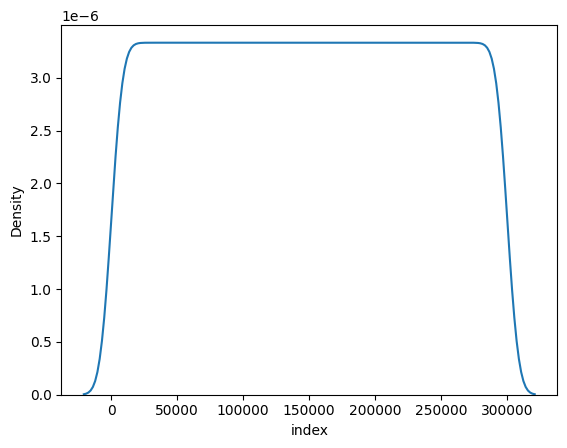

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


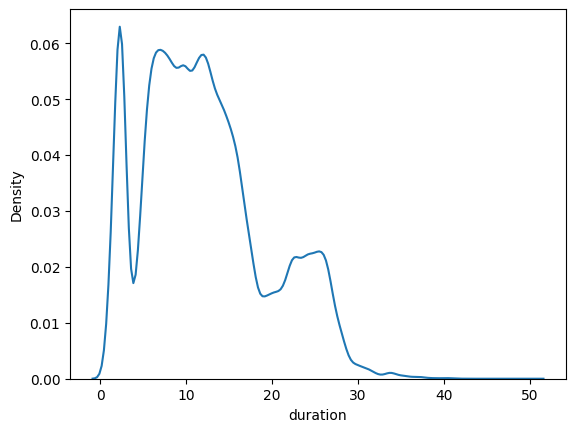

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


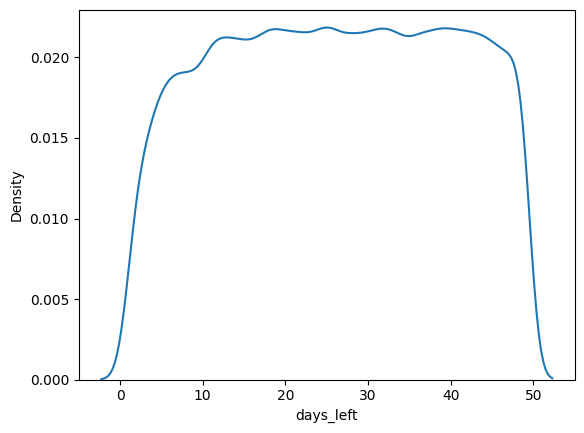

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


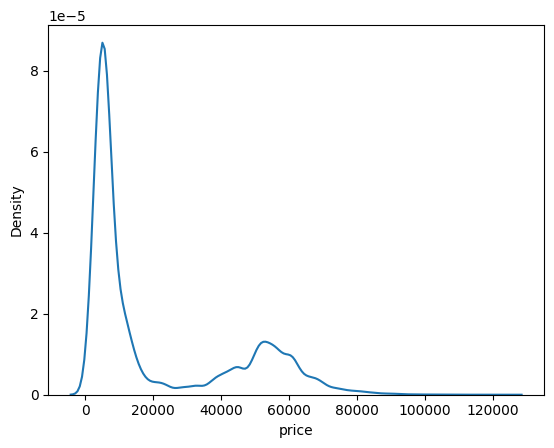

In [13]:
#Distribution of variables
import matplotlib.pyplot as plt
import seaborn as sns

for col in data.select_dtypes('number').columns:
     sns.kdeplot(data[col])
     plt.show()

In [14]:
#correlations
columns = ['duration', 'days_left', 'price']
data[columns].corr()

,duration,days_left,price
duration,1.000000,-0.039157,0.204222
days_left,-0.039157,1.000000,-0.091949
price,0.204222,-0.091949,1.000000


<Axes: >

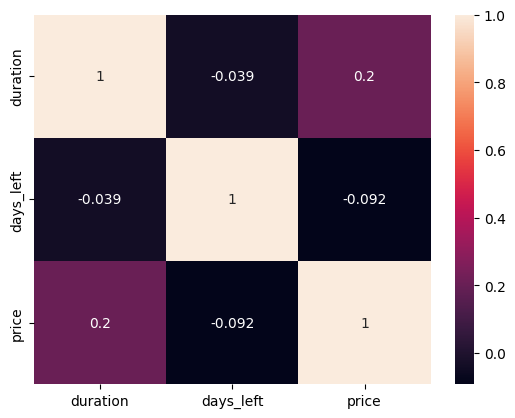

In [15]:
sns.heatmap(data[columns].corr(), annot=True)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

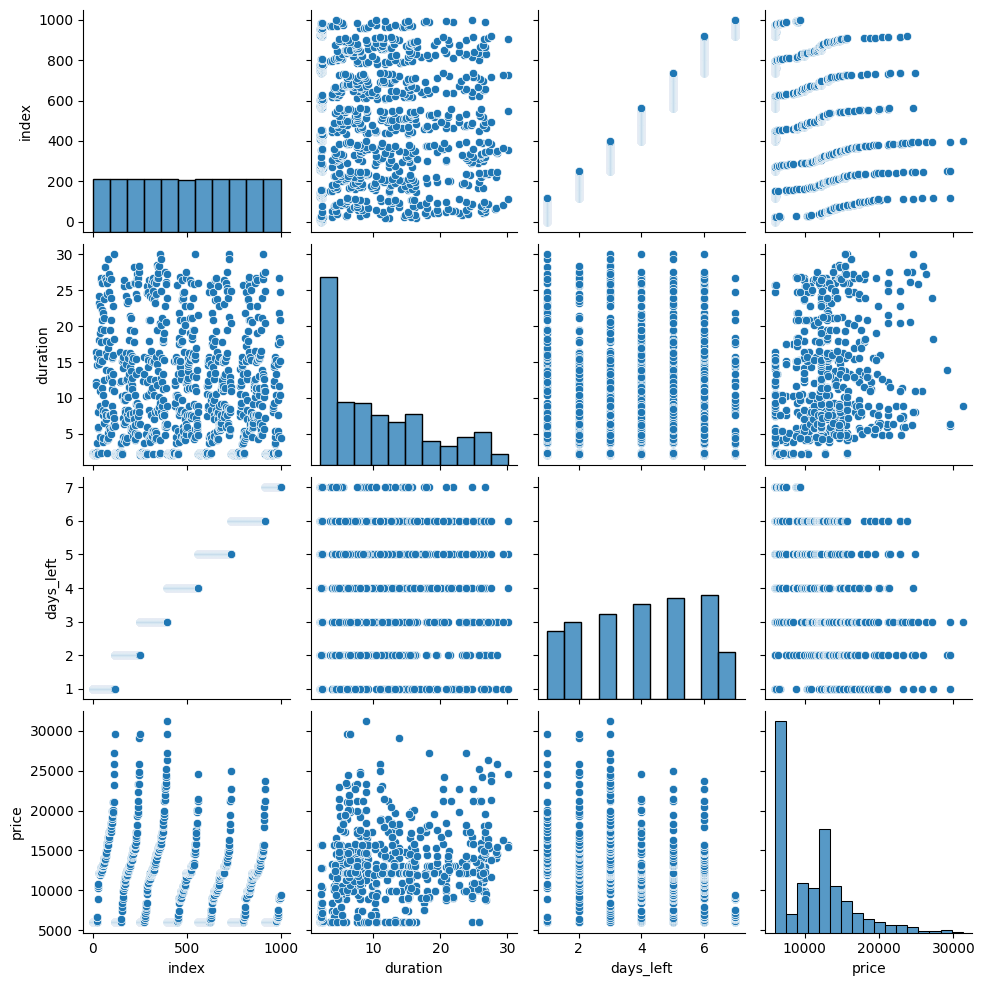

In [16]:
#feature interactions
sns.pairplot(data[:1000])

<Axes: >

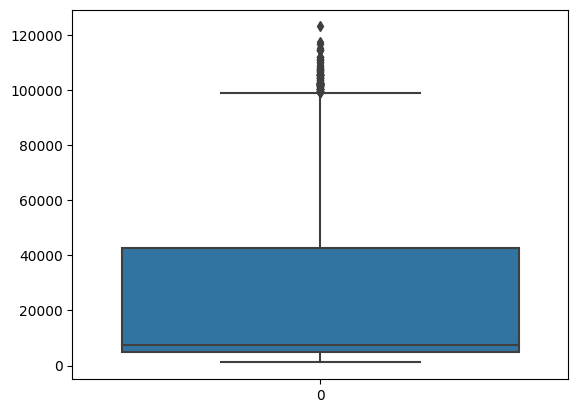

In [17]:
sns.boxplot(data['price'])

In [18]:
#Display outliers values
data[data['price'] >5e4]

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
206671,206671,Vistara,UK-985,Delhi,Evening,zero,Night,Mumbai,Business,2.17,1,50264
206672,206672,Air_India,AI-479,Delhi,Night,one,Afternoon,Mumbai,Business,17.75,1,50669
206673,206673,Air_India,AI-473,Delhi,Evening,one,Evening,Mumbai,Business,22.75,1,51059
206674,206674,Vistara,UK-871,Delhi,Night,one,Afternoon,Mumbai,Business,17.92,1,51731
206675,206675,Vistara,UK-977,Delhi,Evening,zero,Night,Mumbai,Business,2.25,1,53288
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [19]:
#remove outliers
def clean_outliers(data, col):
    q1 = data[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr=q3-q1
    lower_bound= q1-1.5 * iqr
    upper_bound=q3+1.5 * iqr
    data_no_outliers=data(data[col]>=lower_bound) & (data[col]<=upper_bound)
    return data_no_outliers

In [20]:
data.shape

(300153, 12)

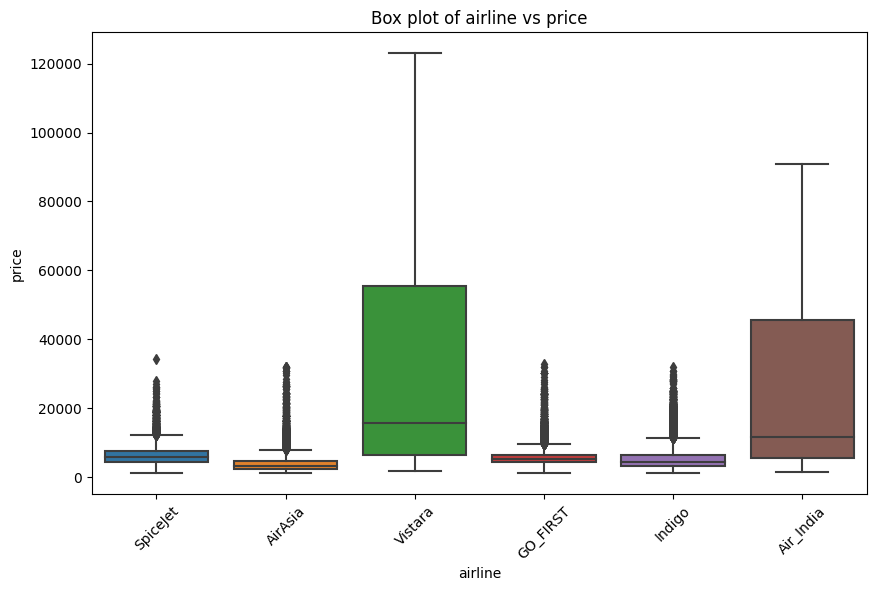

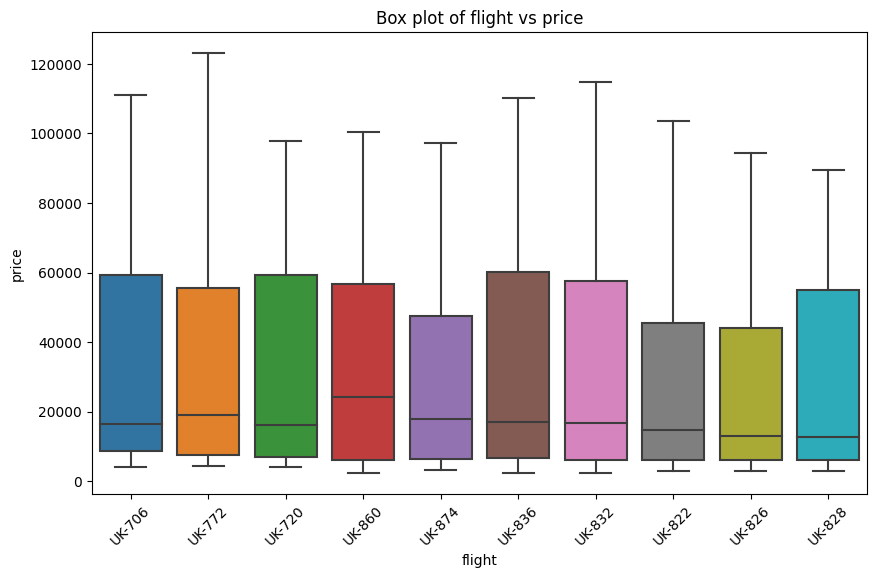

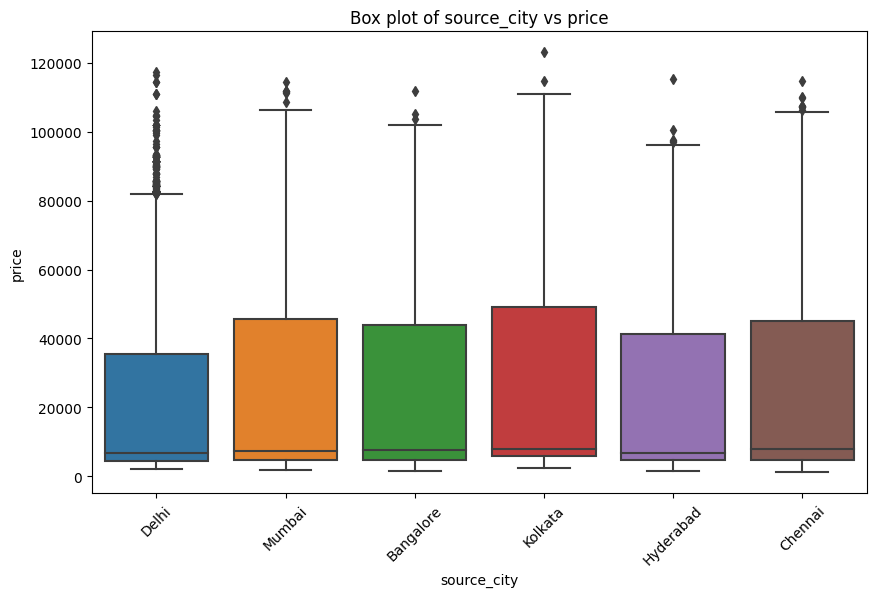

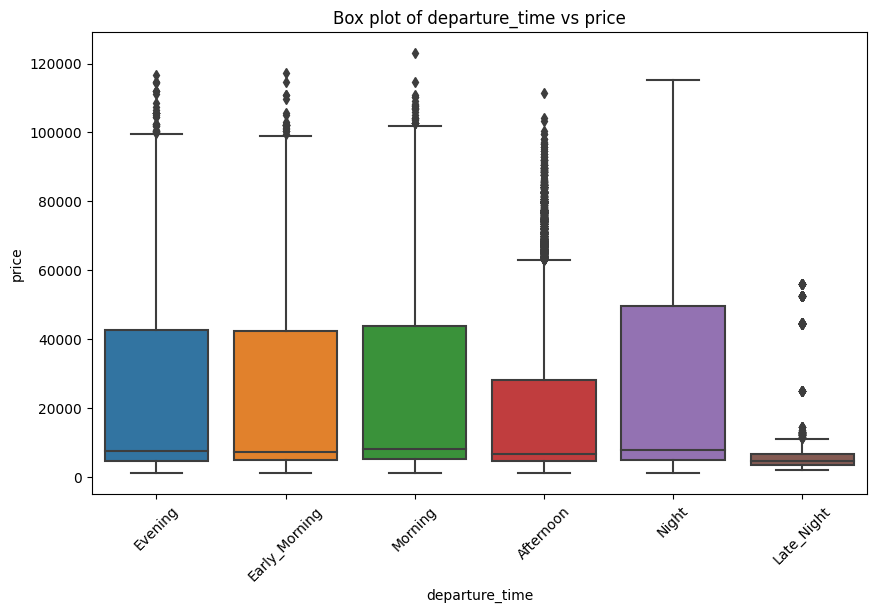

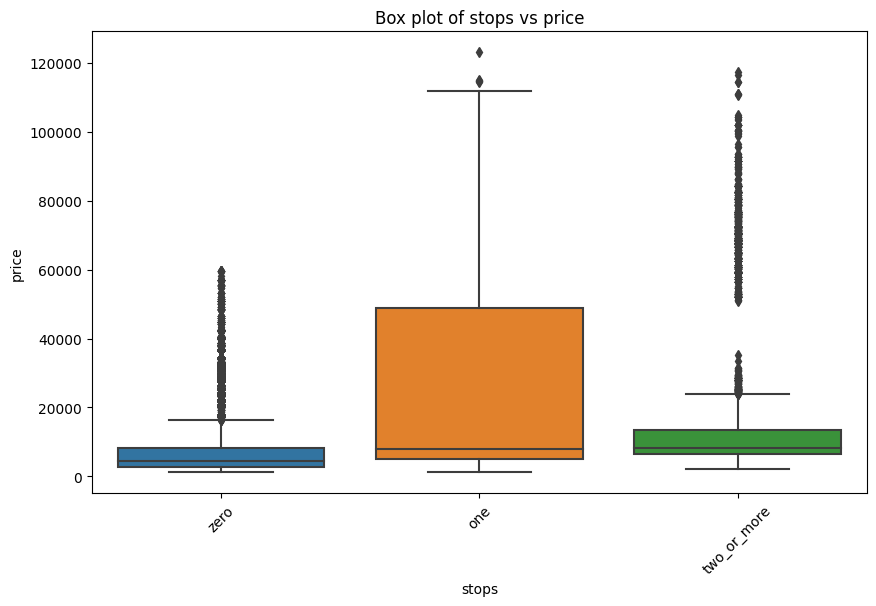

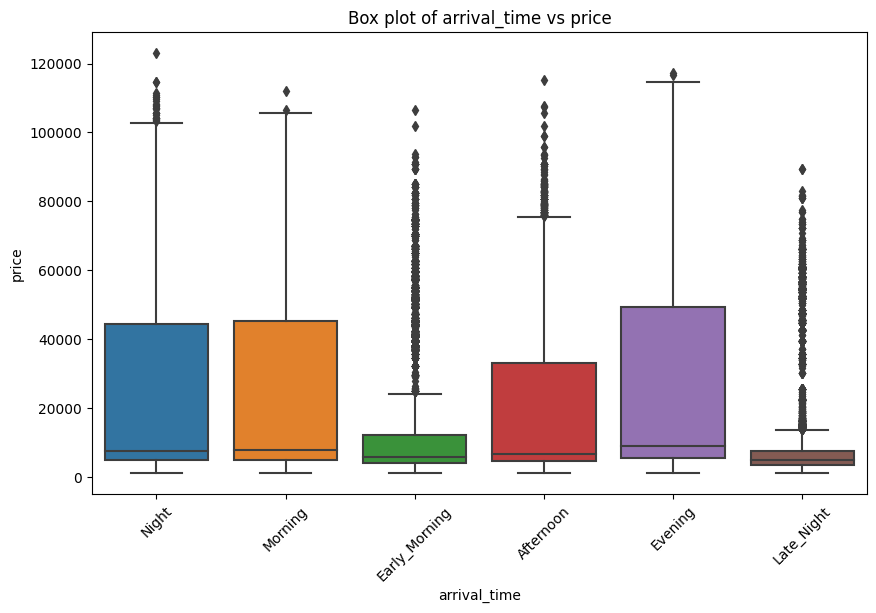

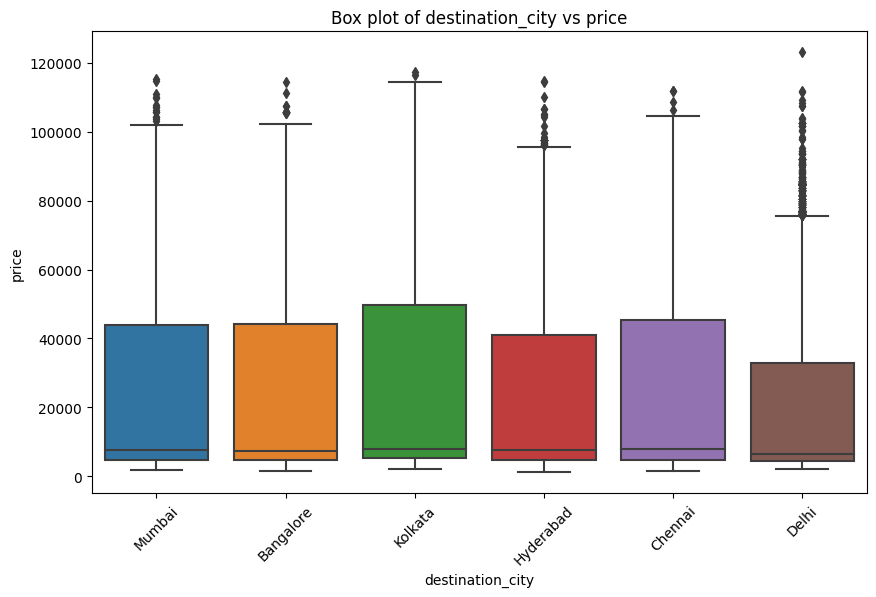

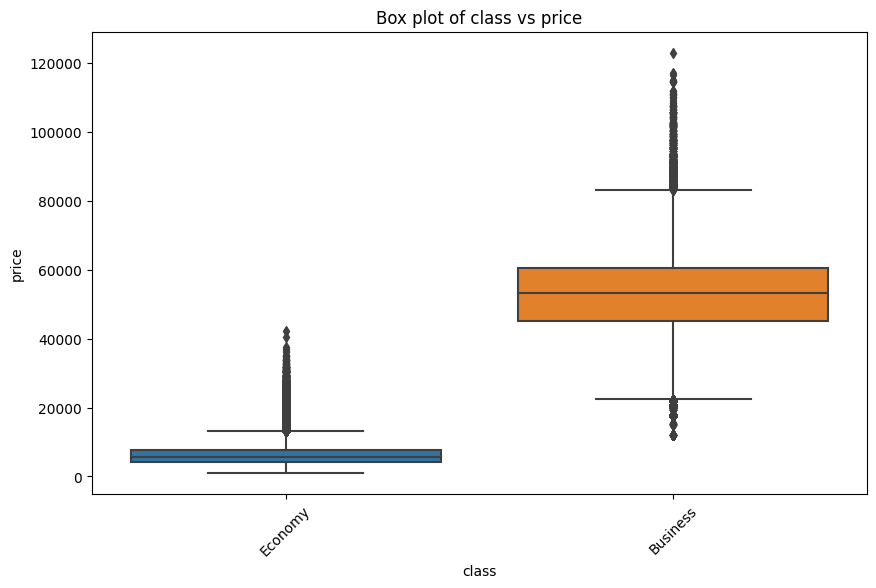

In [21]:
#Target variables analysis
for col in data.select_dtypes('object'):
    top_categories=data[col].value_counts().index[:10]
    filtered_data=data[data[col].isin(top_categories)]
    plt.figure(figsize=(10,6))
    sns.boxplot(x=filtered_data[col],y=filtered_data['price'])
    plt.xticks(rotation=45)
    plt.title(f'Box plot of {col} vs price')
    plt.show()